In [413]:
import time
import warnings
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

from sklearn.metrics import adjusted_rand_score

In [414]:
'''defining datasets'''
samples=500
features=2
clusters=3
noiseRange=100
trialNum=5
blobs = datasets.make_blobs(n_samples=samples,
                            centers=clusters,
                            cluster_std=1,
                            random_state=0)
moons = datasets.make_moons(n_samples=samples, 
                            noise=1)
circles = datasets.make_circles(n_samples=samples, 
                                factor=0.8,
                                noise=1)
classification = datasets.make_classification(n_samples=samples, 
                                  n_features=features,
                                  n_informative=features,
                                  n_redundant=0,
                                  n_repeated=0,
                                  n_classes=clusters,
                                  n_clusters_per_class=1,
                                  flip_y=0.1,
                                  random_state=None,
                                  shuffle=True)

datasets = [blobs,classification,circles,moons]
names=['make_blobs','make_classification','make_circles','make_moons']


clustering_algorithms = [cluster.KMeans(),
                         cluster.AgglomerativeClustering(),
                         cluster.DBSCAN()]
clustering_names=['K-means Clustering','Agglomerative Clustering','DBSCAN']

Text(537.99375, 0.5, 'X2')

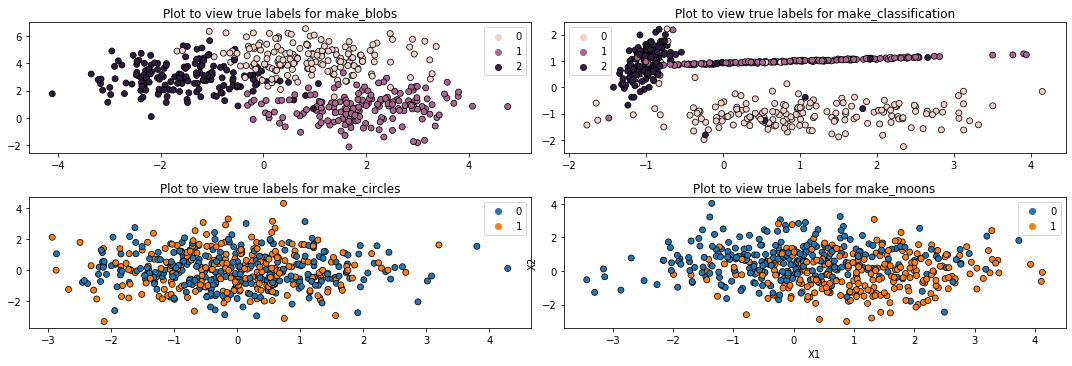

In [415]:
'''Plotting the data'''
f, axes = plt.subplots(2, 2, figsize=(15, 5), sharex=True)
for index,(dataset,name) in enumerate(zip(datasets,names)):
    plt.subplot(2,2,index+1)
    sns.scatterplot(dataset[0][:,0],dataset[0][:,1],hue=dataset[1],edgecolor='black')
    plt.title('Plot to view true labels for ' + name)
    plt.tight_layout()
plt.xlabel('X1')
plt.ylabel('X2')

In [416]:
'''Adding high dimensional noise'''
def addNoise(x,noiseDim,samples=samples,noise_mean=0,noise_std=15):
    noise=np.random.normal(noise_mean,noise_std,[samples,noiseDim])
    data=np.concatenate((x,noise),axis=1)
    return data

In [417]:
def accuracy(algorithm,dataX,dataY):
    cluster=algorithm.fit(dataX)
    label=cluster.labels_
    ARI=adjusted_rand_score(label,dataY)
    return ARI

ARI=np.zeros((len(clustering_algorithms),len(datasets),trialNum,noiseRange))
allTrialARI=np.zeros((len(clustering_algorithms),len(datasets),noiseRange*trialNum)) # to create dataframe
theNoiseDim=np.zeros((len(clustering_algorithms),len(datasets),noiseRange*trialNum))
allARI=[[],[],[]]
event=[[],[],[]]
allNoise=[[],[],[]]
for index,algorithm in enumerate(clustering_algorithms):
    for ind,dataset in enumerate(datasets):
        for trial in range(trialNum):
            for noiseDim in range(0,noiseRange):
                newX=addNoise(dataset[0],noiseDim)
                ARI[index][ind][trial][noiseDim]=accuracy(algorithm,newX,dataset[1])
                allTrialARI[index][ind][noiseDim+trial*noiseRange]=ARI[index][ind][trial][noiseDim]
                theNoiseDim[index][ind][(noiseDim)+trial*noiseRange]=noiseDim
                allARI[index].append(ARI[index][ind][trial][noiseDim])
                event[index].append(events[ind])
                allNoise[index].append(noiseDim)



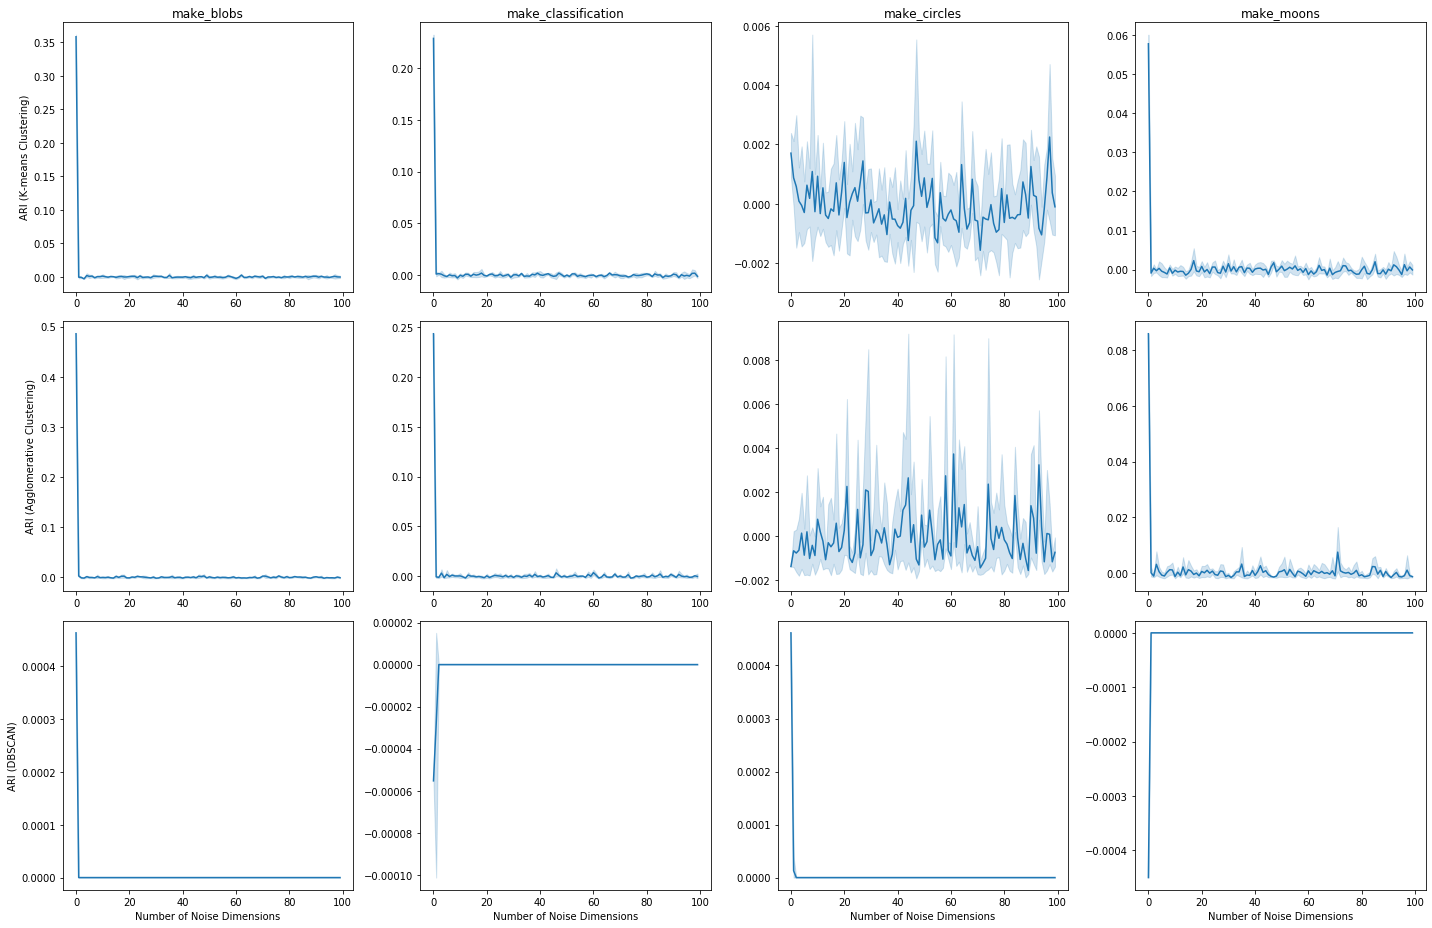

In [389]:
'''plotting ARI vs number of noise dimensions'''
def Plot(z,dimensions,RandIndex,algo,dat,x=len(clustering_algorithms),y=len(datasets)): # dimensions is theNoiseDim[w][r] and RandIndex is allTrialARI[w][r], title is the name
    plt.subplot(x,y,z)
    data={'Number of Noise Dimensions':dimensions,'ARI':RandIndex}
    sns.lineplot(x='Number of Noise Dimensions',y='ARI',data=data)
    if(z%4==1):
        plt.ylabel('ARI'+' ('+algo+')')
    if(z>=9):
        plt.xlabel('Number of Noise Dimensions')         
    if(z<=4):
        plt.title(dat)
    maxid = np.argmax(RandIndex) # The id of the peak (maximum of Rand_Index-2D)
    plt.tight_layout()
    return data



f,axes=plt.subplots(len(clustering_algorithms),len(datasets),figsize=(20, 13),sharex=True,sharey=True)

for index,(algorithm,algoName) in enumerate(zip(clustering_algorithms,clustering_names)):
    for ind,(dataset,name) in enumerate(zip(datasets,names)):
        Plot(index*len(datasets)+1+ind,theNoiseDim[index][ind],allTrialARI[index][ind],algoName,name)

Text(0.5, 1.0, 'Plot of number of noise dimensions V/S ARI for K-Means Clustering')

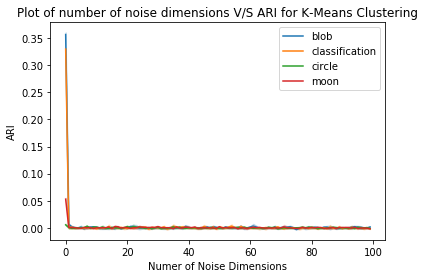

In [441]:
titles=['K-Means Clustering','Agglomerative Clustering','DBSCAN']
data={'Number of Noise Dimensions':allNoise[0],'ARI':allARI[0],'Event':event[0]}
sns.lineplot(x='Number of Noise Dimensions',y='ARI',hue='Event',data=data)
plt.xlabel('Numer of Noise Dimensions')
plt.ylabel('ARI')
plt.title('Plot of number of noise dimensions V/S ARI for K-Means Clustering')

<Figure size 1080x576 with 0 Axes>

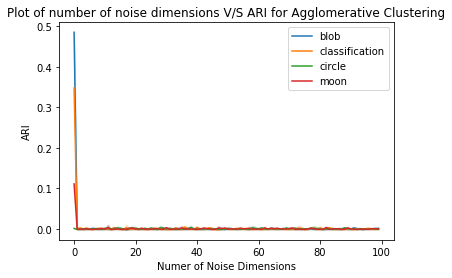

<Figure size 1080x576 with 0 Axes>

In [444]:
data={'Number of Noise Dimensions':allNoise[1],'ARI':allARI[1],'Event':event[1]}
sns.lineplot(x='Number of Noise Dimensions',y='ARI',hue='Event',data=data)
plt.xlabel('Numer of Noise Dimensions')
plt.ylabel('ARI')
plt.title('Plot of number of noise dimensions V/S ARI for Agglomerative Clustering')
plt.figure(figsize=(15,8))

<Figure size 1080x576 with 0 Axes>

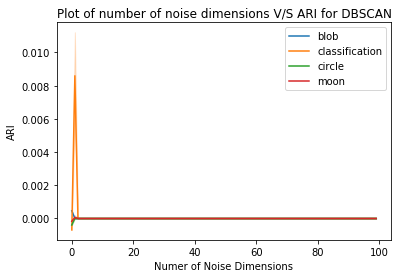

<Figure size 1080x576 with 0 Axes>

In [443]:
data={'Number of Noise Dimensions':allNoise[2],'ARI':allARI[2],'Event':event[2]}
sns.lineplot(x='Number of Noise Dimensions',y='ARI',hue='Event',data=data)
plt.xlabel('Numer of Noise Dimensions')
plt.ylabel('ARI')
plt.title('Plot of number of noise dimensions V/S ARI for DBSCAN')
plt.figure(figsize=(15,8))